In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# necessary user inputs

roh_s = 7923.8
poisson_ration_s = 0.3
C_11 = 206.8e9

roh_f_real = 1.225
K_f_real = 1.4261e5

L1 = 0.1
L2 = 1
L = L1+L2

frequency = 1000

In [3]:
i = complex(0,1)
omega = 2*np.pi*frequency

<IPython.core.display.Javascript object>


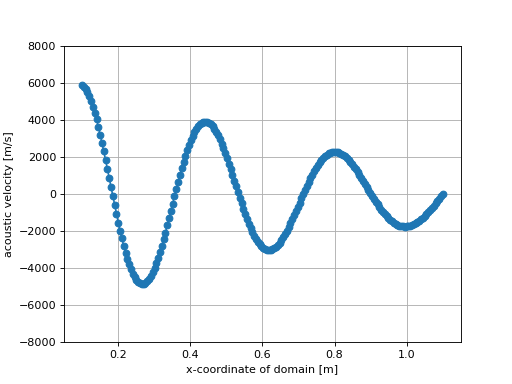

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), FloatSlider(value=0.0, desc…

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.set_ylim([-8000, 8000])
ax.set_xlabel('x-coordinate of domain [m]')
ax.set_ylabel('acoustic velocity [m/s]')
axis = np.linspace(L1, L, 200)
line, = ax.plot(axis, axis, '-o')


def update(t = (0,1,0.01), comp_dens = (-1, 1, 0.01), comp_bulk = (-1, 1, 0.01)):
    roh_f = complex(roh_f_real, roh_f_real*comp_dens)
    K_f = complex(K_f_real, K_f_real*comp_bulk)
    
    k1 = i * np.sqrt(roh_s * omega**2 / C_11)
    sos = np.sqrt(K_f/roh_f)
    k2 = i * omega / sos
    
    a = np.exp(-k2*L)
    b = np.exp(k2*L)
    c = i * omega * np.exp(-k1*L1)
    d = i * omega * np.exp(k1*L1)
    e = np.exp(-k2*L1)
    f = np.exp(k2*L1)
    g = sos**2 * roh_f * k2 * np.exp(k2*L1)
    h = sos**2 * roh_f * k2 * np.exp(-k2*L1)
    l = C_11 * i * omega * k1 * np.exp(k1*L1)
    m = C_11 * i * omega * k1 * np.exp(-k1*L1)
    
    v_p = (l*(d-c)/(l+m)-d) / (g*a*(c-d)/(b*(l+m)) + h*(c-d)/(l+m) + a*f/b - e)
    v_m = -a/b * v_p
    
    def v(t, x):
        return np.exp(i*omega*t)*(v_p*np.exp(-k2*x) + v_m*np.exp(k2*x))
    
    line.set_ydata([v(1/frequency*t, x) for x in axis])
    fig.canvas.draw_idle() 
    
    
interact(update);